In [162]:
import numpy as np
from numpy import exp, pi
import matplotlib.pyplot as plt

In [163]:
def w_a(z):
    return sum([1 / (k*k - k - z) for k in range(1, 10 ** 6 + 1)])

In [164]:
def w_b(z):
    return sum([z / (k * (k - 1) * (k * k - k - z)) for k in range(2, 89)]) + (z - 1) / z

In [165]:
zs = list(map(lambda x: x / 100, range(1, 200)))

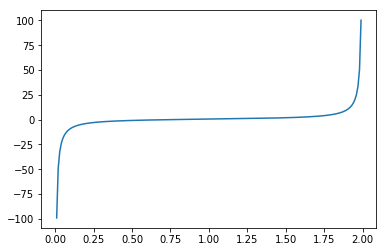

In [166]:
plt.plot(zs, list(map(w_a, zs)))
plt.show()

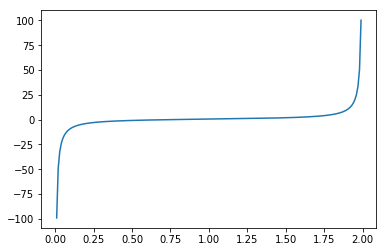

In [167]:
plt.plot(zs, list(map(w_b, zs)))
plt.show()

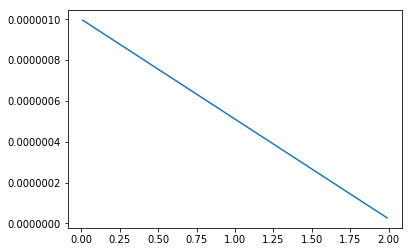

In [168]:
plt.plot(zs, list(map(lambda z: w_b(z) - w_a(z), zs)))
plt.show()

In [169]:
def w_c(z, n):
    def step(x):
        a = np.array(x[:-2])
        b = np.array(x[1:-1])
        c = np.array(x[2:])
        return (c * a - b * b) / (c + a - 2 * b)
    
    vs = [sum([z**k / (2*k - 1) for k in range(1, t + 1)]) for t in range(1, n + 1)]
    w = None
    while len(vs) > 0:
        w = vs[-1]
        vs = step(vs)
    return w

In [170]:
print(w_c(-1, 100))
print(w_c(-0.9, 100))
print(w_c(exp(pi * 0.75j), 100))
print(w_c(1j, 100))

-0.785397981667103
-0.7201172773336413
(-0.6484643491601061+0.48681280301968j)
(-0.24374777096191513+0.8669729996377917j)


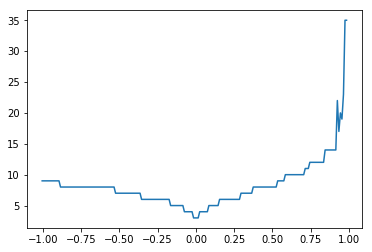

In [171]:
zs = list(map(lambda x: x / 100 - 0.005, range(-100, 100)))

def get_cnt(z):
    v = w_c(z, 1)
    for n in range(2, 100):
        nv = w_c(z, n)
        if (abs(v - nv) < 10 ** -6):
            return n
        v = nv
    return 100

plt.plot(zs, list(map(get_cnt, zs)))
plt.show()